In [1]:
from pathlib import Path

def get_base_dir() -> Path:
    try:
        return Path(__file__).resolve().parent
    except NameError:
        return Path.cwd()

BASE_DIR = get_base_dir().parent  # go one directory up
OUTPUTS_DIR = BASE_DIR / "outputs"

pecha_files = list(OUTPUTS_DIR.rglob("*.json"))
print(f"Number of pechas : {len(pecha_files)}")


Number of pechas : 268


In [2]:
import json

pechas: list[dict] = []
for pecha in pecha_files:
    pechas.append(json.loads(pecha.read_text(encoding="utf-8")))


In [3]:
import matplotlib.pyplot as plt

volumes: dict[int, int] = {}
for pecha in pechas:
    text: dict[str, str] = pecha["texts"]
    vol_freq = len(text.keys())
    
    if vol_freq in volumes:
        volumes[vol_freq] += 1
    else:
        volumes[vol_freq] = 1


print(volumes)

{1: 266, 103: 1, 213: 1}


_Kangyur has 103 volumes and Tengyur has 213 volumes._

### Kangyur and Tengyur Text Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_text_analysis(char_count: dict[str, int], sentence_count: dict[str, int]):
    
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        "pecha_id": list(char_count.keys()),
        "char_count": list(char_count.values()),
        "sentence_count": list(sentence_count.values())
    })

    # --- Plot 1: Distribution of Character Counts ---
    plt.figure(figsize=(8, 5))
    sns.histplot(df["char_count"], bins=30, kde=True, color="royalblue", edgecolor="black")
    plt.title("Distribution of Character Counts per Pecha")
    plt.xlabel("Character Count")
    plt.ylabel("Frequency")
    plt.show()

    # --- Plot 2: Distribution of Sentence Counts ---
    plt.figure(figsize=(8, 5))
    sns.histplot(df["sentence_count"], bins=30, kde=True, color="seagreen", edgecolor="black")
    plt.title("Distribution of Sentence Counts per Pecha")
    plt.xlabel("Sentence Count")
    plt.ylabel("Frequency")
    plt.show()

    # --- Plot 3: Relationship between Char Count and Sentence Count ---
    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=df, x="char_count", y="sentence_count", s=60, alpha=0.7)
    sns.regplot(data=df, x="char_count", y="sentence_count", scatter=False, color="red")  # trend line
    plt.title("Sentence Count vs Character Count per Pecha")
    plt.xlabel("Character Count")
    plt.ylabel("Sentence Count")
    plt.show()


In [5]:
"""
Analysis of Kangyur and Tengyur
"""

from tqdm import tqdm
from bo_sent_tokenizer import segment

BASE_DIR = get_base_dir().parent  # go one directory up
OUTPUTS_DIR = BASE_DIR / "outputs"

# Text Analysis
char_count: dict[str, int] = {}
sentence_count: dict[str, int] = {}

pecha_ids = [ "P000001", "P000002"]

kangyur_tengyur = [json.loads(Path(OUTPUTS_DIR / f"{pecha_id}.json").read_text(encoding="utf-8")) for pecha_id in pecha_ids]
for pecha in tqdm(kangyur_tengyur, desc="Text Analysis"):
    vol_texts: dict[str, str] = pecha["texts"]

    for vol_id, text in vol_texts.items():
        pecha_id = pecha["pecha_id"]
        # Character Count
        char_count[f"{pecha_id}_{vol_id}"] = len(text)

        # Sentence Count
        sentences = segment(text)
        sentence_count[f"{pecha_id}_{vol_id}"] = len(sentences.splitlines())

Text Analysis: 100%|██████████| 2/2 [00:30<00:00, 15.25s/it]


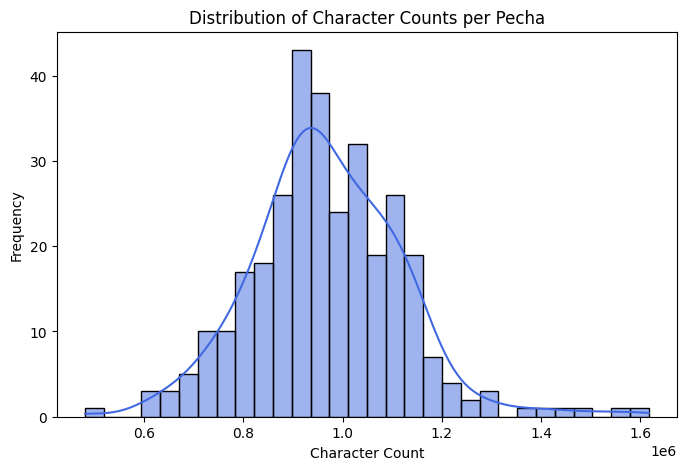

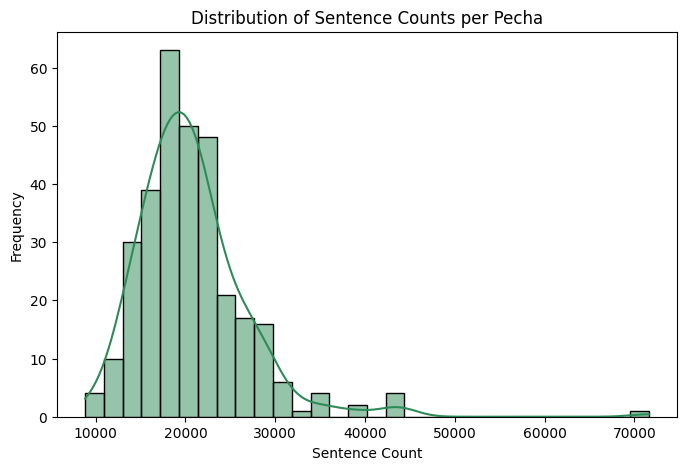

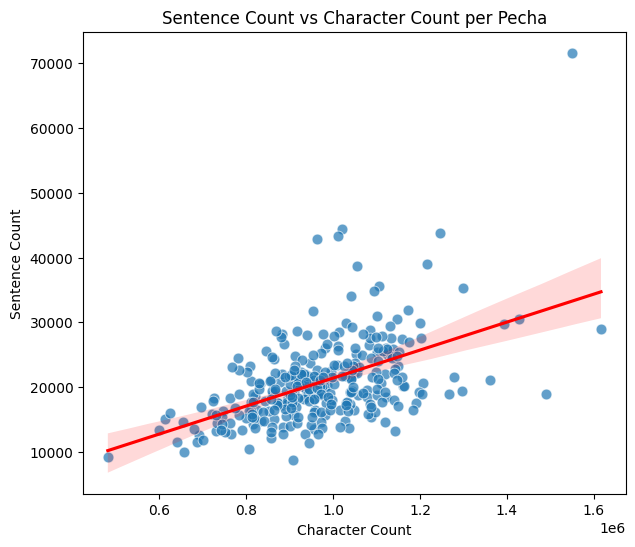

In [6]:
plot_text_analysis(char_count, sentence_count)

In [7]:
# Create a DataFrame for plotting
kangyur_tengyur_df = pd.DataFrame({
    "pecha_id": list(char_count.keys()),
    "char_count": list(char_count.values()),
    "sentence_count": list(sentence_count.values())
})
kangyur_tengyur_df.describe()

,char_count,sentence_count
count,3.160000e+02,316.000000
mean,9.690605e+05,20733.360759
std,1.524024e+05,6354.466242
min,4.811990e+05,8824.000000
25%,8.797618e+05,16859.500000
50%,9.579165e+05,19856.000000
75%,1.056583e+06,23197.500000
max,1.616827e+06,71600.000000


## Overall Text Analysis

In [11]:
from tqdm import tqdm
from bo_sent_tokenizer import segment

# Text Analysis
char_count: dict[str, int] = {}
sentence_count: dict[str, int] = {}


for pecha in tqdm(pechas, desc="Text Analysis"):
    pecha_id = pecha["pecha_id"]

    texts = pecha["texts"]

    if len(texts) > 1:
        for vol_id, text in texts.items():
            # Character Count
            char_count[f"{pecha_id}_{vol_id}"] = len(text)

            # Sentence Count
            sentences = segment(text)
            sentence_count[f"{pecha_id}_{vol_id}"] = len(sentences.splitlines())

    else:
        text = list(texts.values())[0]
        # Character Count
        char_count[pecha["pecha_id"]] = len(text)

        # Sentence Count
        sentences = segment(text)
        sentence_count[pecha["pecha_id"]] = len(sentences.splitlines())

Text Analysis: 100%|██████████| 268/268 [00:37<00:00,  7.11it/s]


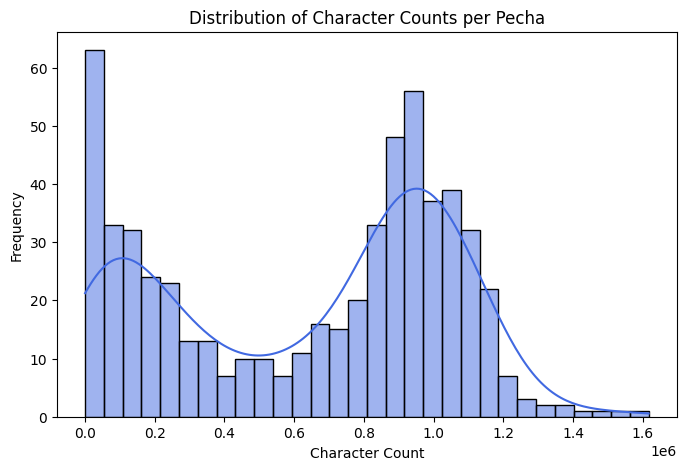

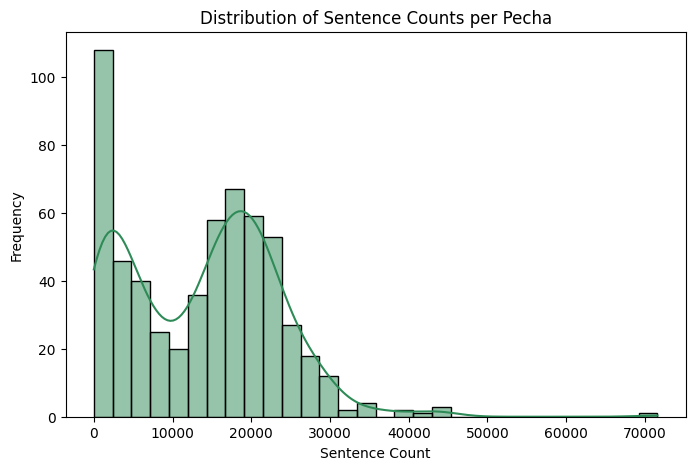

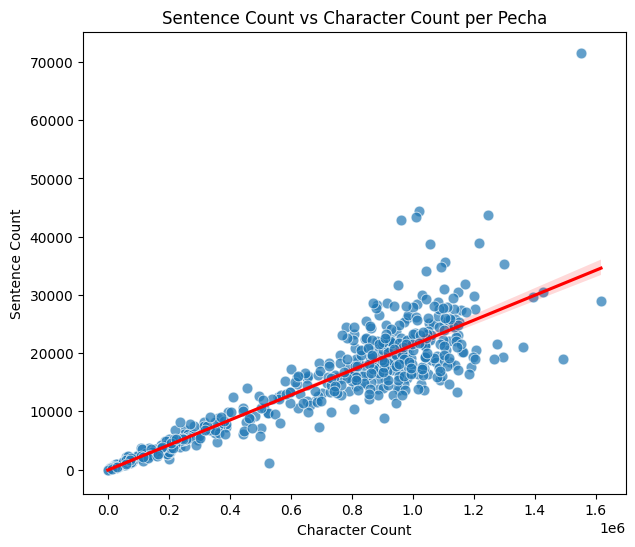

In [12]:
plot_text_analysis(char_count, sentence_count)

In [13]:
# Create a DataFrame for plotting
pecha_df = pd.DataFrame({
    "pecha_id": list(char_count.keys()),
    "char_count": list(char_count.values()),
    "sentence_count": list(sentence_count.values())
})
pecha_df.describe()

,char_count,sentence_count
count,5.820000e+02,582.000000
mean,6.398995e+05,13646.091065
std,4.083078e+05,9690.138862
min,1.190000e+02,5.000000
25%,2.049782e+05,4171.500000
50%,7.957415e+05,15267.500000
75%,9.718908e+05,20531.500000
max,1.616827e+06,71600.000000


In [16]:
temp_df = pecha_df.sort_values(by="sentence_count")
temp_df.to_csv("pecha_df.csv", index=False)